题目三、以鸢尾花数据集为例 学习k-means聚类

c:\Users\89172\anaconda3\envs\tmp\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\89172\anaconda3\envs\tmp\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


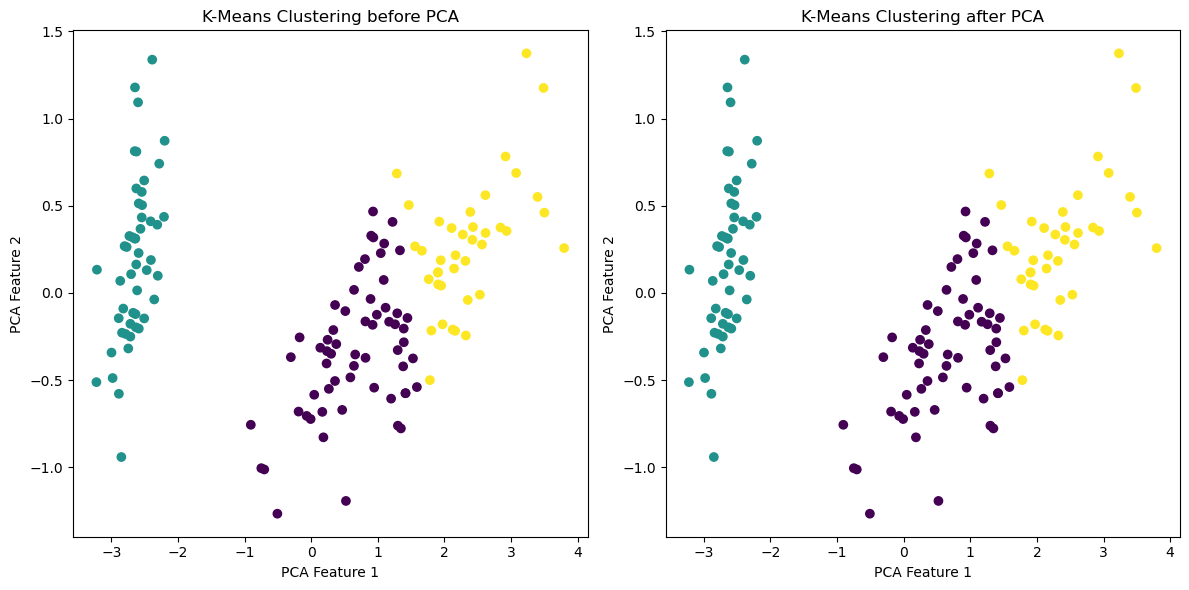

c:\Users\89172\anaconda3\envs\tmp\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\89172\anaconda3\envs\tmp\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\89172\anaconda3\envs\tmp\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\89172\anaconda3\envs\tmp\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

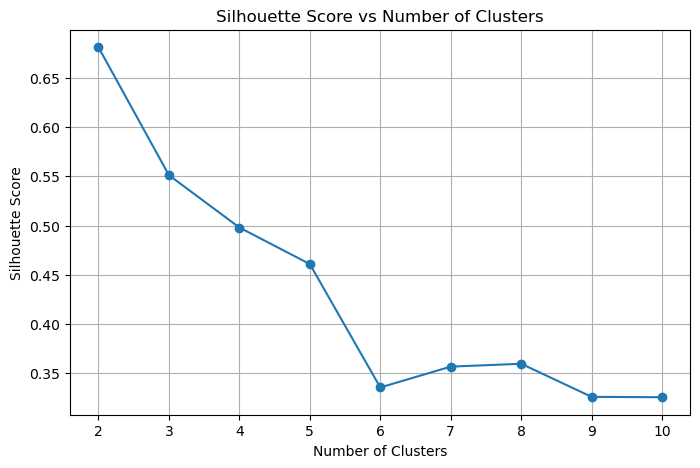

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 加载数据集
iris = datasets.load_iris()
X = iris.data

# K-Means聚类
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X)

# PCA降维到2维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 可视化结果
plt.figure(figsize=(12, 6))

# 原始数据聚类可视化
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('K-Means Clustering before PCA')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')

# 先降维再聚类可视化
X_pca_clusters = kmeans.fit_predict(X_pca)
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_pca_clusters, cmap='viridis', marker='o')
plt.title('K-Means Clustering after PCA')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')

plt.tight_layout()
plt.show()

# 计算轮廓系数
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    clusters = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, clusters))

# 绘制轮廓系数与聚类数的关系图
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()
